<a href="https://colab.research.google.com/github/anastasiias036/hometasks_ml/blob/main/%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('/content/drive/MyDrive/kurs_ml/data/medical-charges.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.histogram(medical_df,
                   x="charges",
                   color="sex",
                   marginal="box",
                   nbins=50,
                   title="Distribution of Medical Charges by Sex",
                   facet_col="region")

fig.update_layout(bargap=0.1)
fig.show()


Розподіл charges є правосторонньо скошеним і більшість значень розташовані в межах 0-20. Також можемо помітити пацієнтів з витратами 60к і на боксплоті вони зазначені як аутлайери.

Чоловіки мають більший розмах витрат порівняно із жінками. Дані, що для чоловіків, що для жінок розкидані приблизно однаково, але все одно серед чоловічої статі спостерігаємо більшу кіл-ть великих розтрат

У регіоні southeast ми бачимо більшу кіл-ть випадків з витратами понад 40к. У northwest і southwest кількість викидів менша, а основна маса значень сконцентрована в нижньому діапазоні.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
import plotly.express as px
import pandas as pd

df = medical_df
# Plotting the distribution of 'region' and 'children' with respect to smoker status
fig = px.histogram(df, x='region', color='smoker', title="Distribution of 'Region' based on Smoking Status")
fig.update_layout(barmode='stack')
fig.show()

fig = px.histogram(df, x='children', color='smoker', title="Distribution of 'Children' based on Smoking Status")
fig.update_layout(barmode='stack')
fig.show()


По 1 графіку бачимо, що розбіжність по регіонам між курцями та не курцями не є занадто великою. Найбільш курців ми бачимо у регіоні southeast. І найменше у southwest та northwest регіонах.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [4]:
import plotly.express as px
import pandas as pd

In [6]:
df = medical_df
fig = px.violin(df, x='children', y='charges', box=True, points='all',
                title='Violin Plot of Charges vs. Number of Children')
fig.show()

Розподіл медичних витрат (charges) схожий для груп із 0–3 дітьми, з наявністю високих витрат у всіх категоріях. Для сімей із 4–5 дітьми спостерігається нижчий рівень витрат і менша кількість даних. Загалом кількість дітей не має очевидного впливу на рівень витрат.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [16]:
import matplotlib.pyplot as plt

In [17]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [18]:
def estimate_charges(age, w, b):
    return w * age + b

In [14]:
def try_parameters(non_smoker_df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

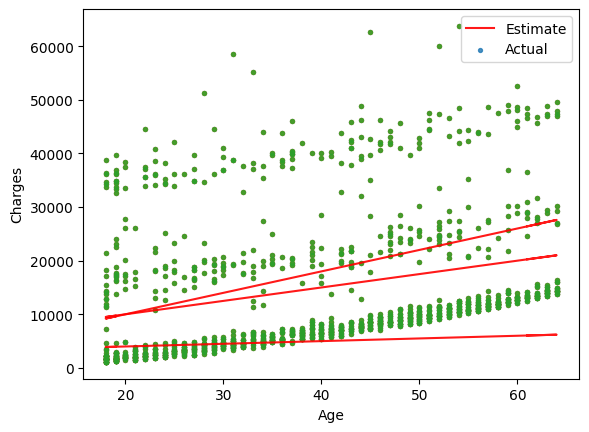

In [22]:
parameter_pairs = [(250, 5000), (400, 2000), (50, 3000)]
for w, b in parameter_pairs:
    try_parameters(non_smoker_df, w, b)

Бачимо, що лише одна з ліній найбільш близько розташована до даних, але все одно треба коригувати значення b або w

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [23]:
import numpy as np

def estimate_charges(ages, w, b):
    return w * ages + b

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def try_parameters_and_rmse(non_smoker_df, parameter_pairs):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    for w, b in parameter_pairs:
        estimated_charges = estimate_charges(ages, w, b)
        error = rmse(target, estimated_charges)
        print(f"RMSE for w = {w}, b = {b}: {error}")

# Приклад параметрів для перевірки
parameter_pairs = [(250, 5000), (400, 2000), (50, 3000)]

# Обчислення RMSE для кожної пари параметрів
try_parameters_and_rmse(non_smoker_df, parameter_pairs)


RMSE for w = 250, b = 5000: 7931.740696956547
RMSE for w = 400, b = 2000: 10587.301630704422
RMSE for w = 50, b = 3000: 6564.874895404051


Найнижче значення втрат, яке вдалось досягти, становить 6564.87 для
𝑤
=
50
 і b=3000. Стратегію для знаходження кращих значень
𝑤
w та
𝑏
b можна побудувати за допомогою методу проб та помилок, поступово змінюючи параметри і шукаючи ті, які мінімізують RMSE.